# 다항회귀

## 다항식 특성으로 변환

In [1]:
# sample [[0,1][2, 3]] 변환 연습
import numpy as np

X = np.arange(4).reshape(2,2)
print(X)
#sample * features

[[0 1]
 [2 3]]


In [3]:
# sampel [[0,1][2, 3]] 변환 연습
import numpy as np

X = np.arange(4).reshape(-1,1)
print(X)

[[0]
 [1]
 [2]
 [3]]


PolynomialFeatures : 주어진 특성을 조합하여 다항식 형태로 변환해준다. 특성을 늘려준다.

In [4]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

In [10]:
# fit
poly.fit(X)

# transform
X_poly = poly.transform(X)
print(X_poly)

[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [11]:
# fit + transform
X_poly = poly.fit_transform(X)
print(X_poly)

[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [12]:
# 어떤 항(특성)이 곱해지는지(만들어지는지) 알고 싶을때
poly.get_feature_names()

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

## 사이킷런으로 다항 회귀 분석

### 1) 데이터 준비: 데이터를 생성하여 탐색 및 확인

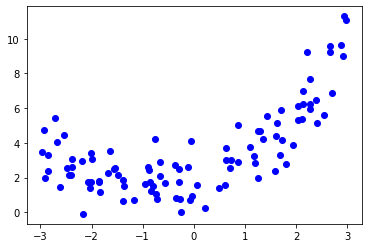

In [7]:
import numpy as np
import matplotlib.pyplot as plt

X = 6*np.random.rand(100,1) -3    # -3~3
y = 0.5 * X**2 + X + 2 + np.random.randn(100,1)

plt.scatter(X,y,color = 'blue')
plt.show()

### 2) 단순 선형 회귀 분석 및 시각화 : 비교 목적

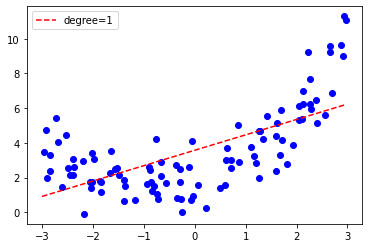

In [8]:
from sklearn.linear_model import LinearRegression

X1_train = X
y_train = y

reg1 = LinearRegression().fit(X1_train,y_train)   # 단순 선형회귀 학습 - 회귀식이 나타남

xx = np.arange(-3,3,0.03)[:,np.newaxis] # 1차원->2차원 (새로운 축 쌓기)
yy = reg1.predict(xx) # 회귀식의 모델 예측 값
plt.plot(xx,yy,color='r',linestyle='--',label='degree=1') # 선
plt.scatter(X,y,color='b') # 파란점
plt.legend() #설명 표

plt.show()

### 3) 2차항 형태로 다항 회귀 수행

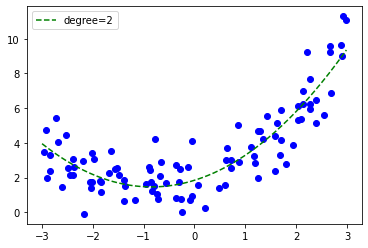

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)  # 2차다항

X2_train = poly.fit_transform(X) #특성갯수늘이기
y_train = y #변환기

reg2 = LinearRegression().fit(X2_train,y_train) #추정(선형회귀)

xx = np.arange(-3,3,0.01)
yy = reg2.predict(poly.transform(xx[:,np.newaxis]))

plt.plot(xx,yy,color='g',linestyle='--',label='degree=2')
plt.scatter(X,y,color='b')
plt.legend()

plt.show()

### 구해진 2차식의 계수 확인

In [10]:
reg2.intercept_,reg2.coef_

(array([1.84340042]), array([[0.        , 0.90684471, 0.53648779]]))

### 4) 7차항 형태로 다항회귀 수행

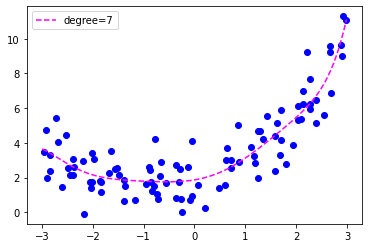

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=7) #7차 다항회귀

X7_train = poly.fit_transform(X)
y_train = y

reg7 = LinearRegression().fit(X7_train,y_train)

xx = np.arange(-3,3,0.01)
yy = reg7.predict(poly.transform(xx[:,np.newaxis])) # 7차 모델의 예측값

plt.plot(xx,yy,color='magenta',linestyle='--',label='degree=7')
plt.scatter(X,y,color='b')
plt.legend()
plt.show()

### 여러 형태의 시각화 그래프 비교

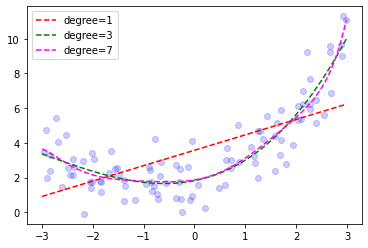

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

degree = [1,3,7]
colors = ['red','green','magenta']

plt.scatter(X,y,color='b',alpha=0.2)

for i,d in enumerate(degree):
    poly = PolynomialFeatures(degree=d)
    X_train = poly.fit_transform(X)
    y_train = y
    
    reg = LinearRegression().fit(X_train,y_train)
    xx = np.arange(-3,3,0.01)
    yy = reg.predict(poly.transform(xx[:,np.newaxis]))
    
    plt.plot(xx,yy,color=colors[i],linestyle='--',label='degree={}'.format(d))
    plt.legend()

plt.show()

# Pipeline
sklearn.pipleline 모듈을 사용하여 [ PolynomialFeature + fit_transform ]  기능을 단순화 시킨다.

### 1) degree=2인 모델 - pipeline 활용

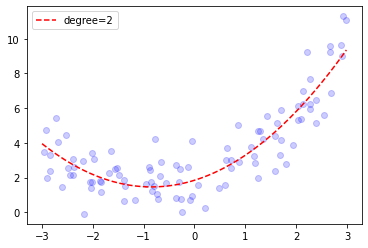

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 여러개의 변환기와 마지막 추정기를 넣어줄 수 있다 
reg = make_pipeline(PolynomialFeatures(degree=2),LinearRegression()).fit(X,y)

xx=np.arange(-3,3,0.01)[:,np.newaxis]
yy = reg.predict(xx)

plt.plot(xx,yy,color='r',linestyle='--',label='degree=2')
plt.scatter(X,y,color='b',alpha=0.2)
plt.legend()
plt.show()

### 2) degree=[1,3,7]인 모델 - pipeline 추정통합

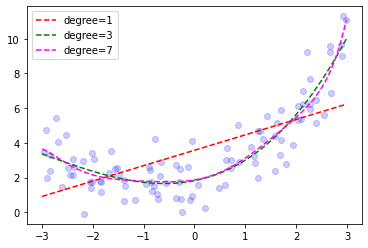

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = [1,3,7]
colors = ['red','green','magenta']

plt.scatter(X,y,color='b',alpha=0.2)

for i,d in enumerate(degree):
    
    reg = make_pipeline(PolynomialFeatures(degree=d),
                                           LinearRegression()).fit(X,y)
    xx = np.arange(-3,3,0.01)[:,np.newaxis]
    yy = reg.predict(xx)
    
    plt.plot(xx,yy,color=colors[i],linestyle='--',label='degree={}'.format(d))
    plt.legend()

plt.show()

# [실습 1]: 보스턴 집값 데이터셋을 활용한 다항회귀 실습 - 방의 갯수 VS 가격

### 필요한 모듈 import

#### 데이터 수집

In [ ]:
boston = load_boston()

#### 데이터 이해

In [ ]:
#boston.DESCR
print(boston.feature_names)

#### 데이터 준비

In [ ]:
# 독립변수, 종속변수를 데이터프레임으로 정리

In [ ]:
# 데이터프레임 확인


In [ ]:
# 학습용, 검증용 데이터 분할


#### 모델 구축

In [ ]:
# 시각화를 위한 xx 좌표계 미리 준비
# y축 좌표계는 각 모델마다 만듦
# 방의 갯수 최대값, 최소값

In [ ]:
#원본 데이터 단순 회귀


In [ ]:
# 아래 셀에 있는 '???'를 지우고 본인이 작성한 코드를 입력하면 됩니다. 

In [ ]:
# 2차식의 다항회귀
X2_train = ???
X2_test = ???

reg2 = ???
y_pred2 = ???

print(reg2.coef_, reg2.intercept_)

xx2 = ???
yy2 = ???

In [ ]:
# 3차식의 다항회귀
X3_train = ???
X3_test = ???

reg3 = ???
y_pred3 = ???

print(reg3.coef_, reg3.intercept_)

xx3 = ???
yy3 = ???


####  다항 회귀 시각화

#### 모델 성능 평가

In [ ]:
# 차수에 따른 r2(결정계수)를 시리즈로 만들어보자
data = { 1 : r2_score(y_test, y_pred1),
         2 : r2_score(y_test, y_pred2),
         3 : r2_score(y_test, y_pred3) }
       
print(pd.Series(data))
